### M&DL 01

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv("C:/BigData/Kaggle/ML&DataSurvey2017/schema.csv")
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
mcq = pd.read_csv("C:/BigData/Kaggle/ML&DataSurvey2017/multipleChoiceResponses.csv", encoding='ISO-8859-1' )
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


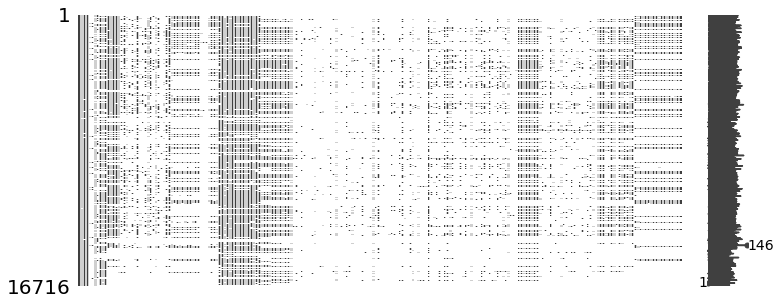

In [9]:
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

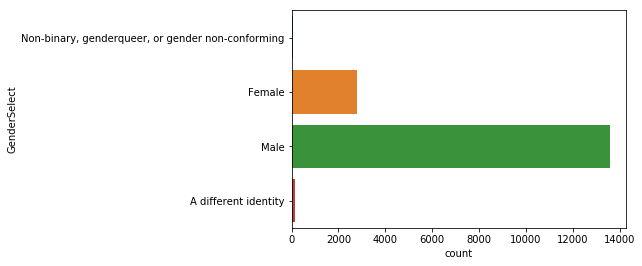

In [10]:
sns.countplot(y='GenderSelect', data=mcq)

In [11]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = ['응답수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

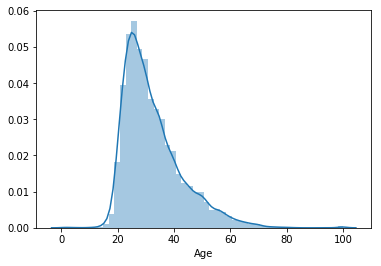

In [13]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

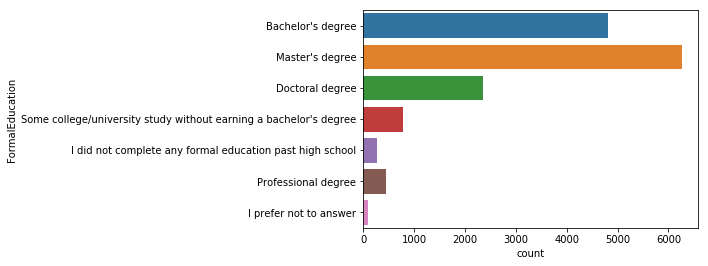

In [14]:
sns.countplot(y='FormalEducation', data=mcq)

In [15]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True,right_index=True
)
mcq_major_df.columns=['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


In [16]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

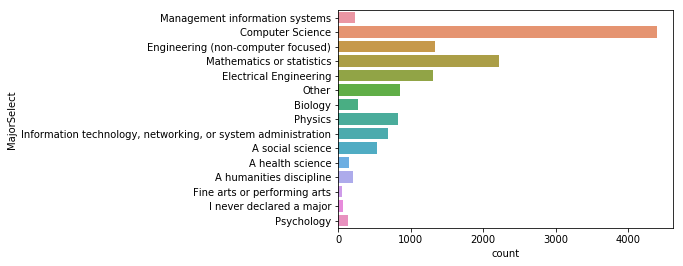

In [17]:
sns.countplot(y='MajorSelect', data=mcq)

In [18]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df

,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


In [19]:
mcq_es_df.columns = ['응답수','비율']
mcq_es_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


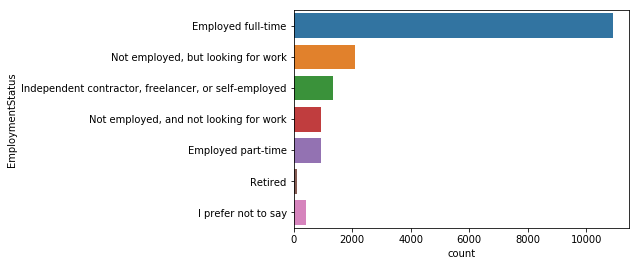

In [20]:
sns.countplot(y='EmploymentStatus', data=mcq)

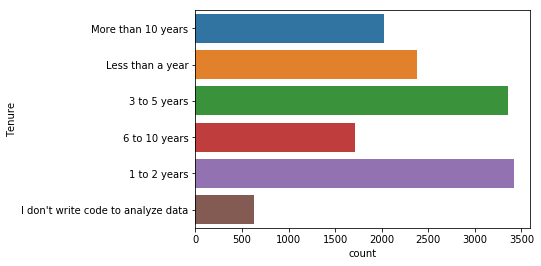

In [21]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea : 194


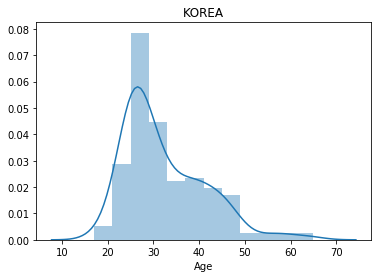

In [22]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea : ' + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title("KOREA")
plt.show()

In [23]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


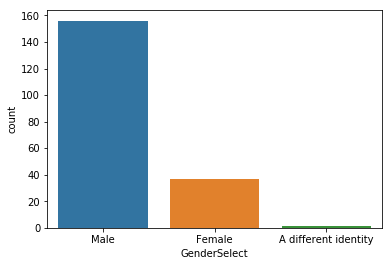

In [24]:
sns.countplot(x='GenderSelect', data=korea)
plt.show()

Text(0.5, 1.0, 'Korean Male')

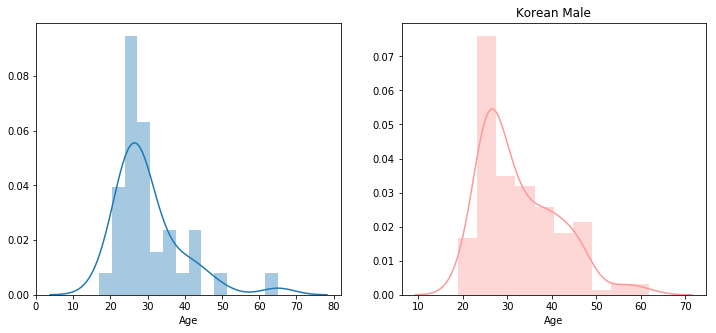

In [25]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] =="Female"].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[1], ax= ax1)
plt.title('Korean Female')
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax2)
plt.title('Korean Male')

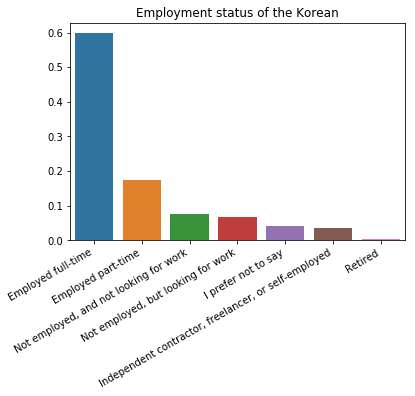

In [26]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')
plt.title("Employment status of the Korean")
plt.ylabel("")
plt.show()

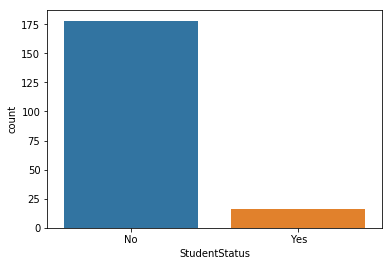

In [27]:
korea['StudentStatus'] = korea['StudentStatus'].fillna("No")
sns.countplot(x='StudentStatus', data=korea)
plt.show()

In [28]:
mcq.to_excel("c:/BigData/Kaggle/ML&DataSurvey2017/01. mcq.xlsx" , encoding='utf-8')

In [29]:
full_time = mcq.loc[(mcq['EmploymentStatus'] =='Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


### M&DL 02

#### 설문조사 응답분석 2
자주 묻는말 FAQ


Q1. python과 R 중에 어떤 언어를 배워야 할까? 

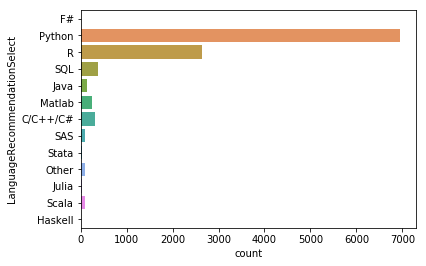

In [30]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)


 - 파이썬이 압도적으로 선호하고 있으며, 전문가와 강사들이 선호하는 언어를 알아본다.

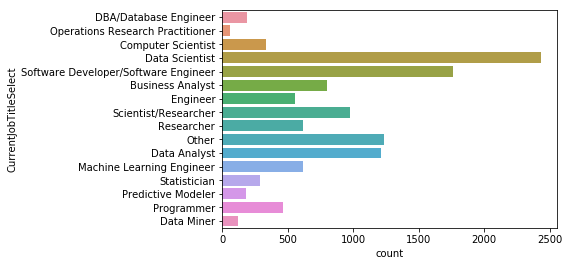

In [31]:
# 현재하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [32]:
# 현재하는 일에 대한 전체 응답수 
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7737, 228)


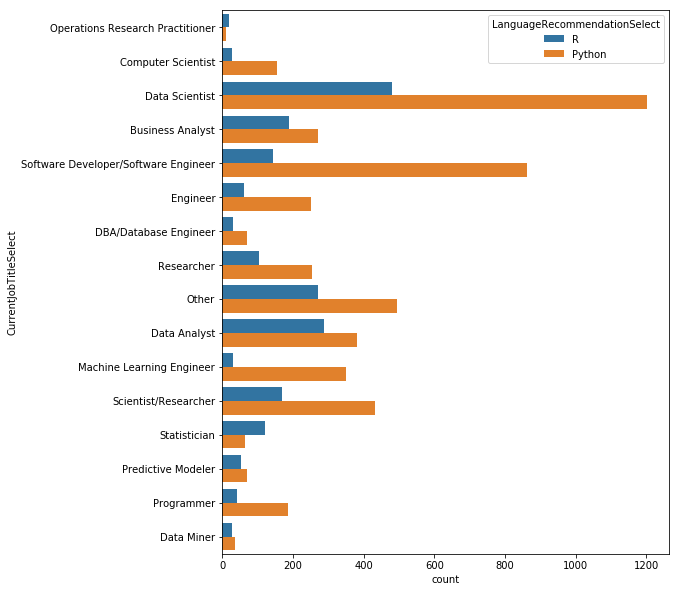

In [33]:
# 현재 하는일에 대해 응답을 해준 사람 중 python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ( mcq['LanguageRecommendationSelect'] =='Python') | (mcq['LanguageRecommendationSelect'] =='R')]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)


 데이터 사이언티스트 & 소프트웨어개발자/엔지니어들은 Python을 주로 사용하지만, R 사용자들도 대부분이다. 통계학분야는 R 사용비중이 높다

Q2. 데이터 사이언스 분야에서 앞으로 크게 주목 받을 것은 무엇일까? 

##### 데이터사이언스 툴

In [34]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True)
mcq_ml_tool_df.columns = ['응답수', '비율']
mcq_ml_tool_df

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


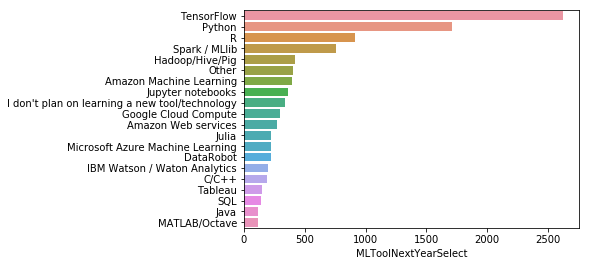

In [35]:
data = mcq["MLToolNextYearSelect"].value_counts().head(20)
sns.barplot(y=data.index, x=data)


 구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답.
 그리고 python이 15%, R은 8%
 
 클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson순으로 응답

#### 데이터사이언스 방법

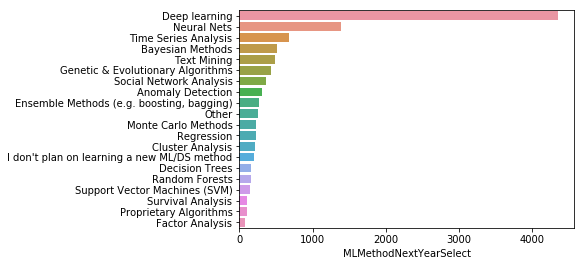

In [36]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고, 시계열분석, 베이지안, 텍스트 마이닝 등이 뒤를 이음.
중간쯤에 부스팅과 배깅 같은 앙상블 메소드도 있음.

Q3. 어디에서 데이터 사이언스를 배워야 할까?

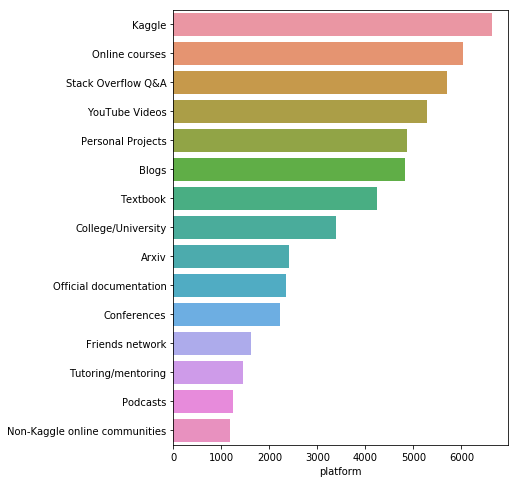

In [37]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

 * kaggle은 응답자들 사이에서 가장 인기있는 학습 플랫폼
 * 그러나 이 설문조사를 한 곳이 캐글이기 때문에 응답이 편향 되어있을 수 있음.
 * 온라인 코스, 스택오버플로, 유튜브 상위 5대 최우수 학습 플랫폼은 대학이나 교과서의 중요도보다 높다.

In [38]:
# 설문 내용과 누구에게 물어봤는지를 찾아봄.

qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [39]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]
#LearningPlatformUsefulness 컬럼에 내용이 비어있지 않은 항목만 저장

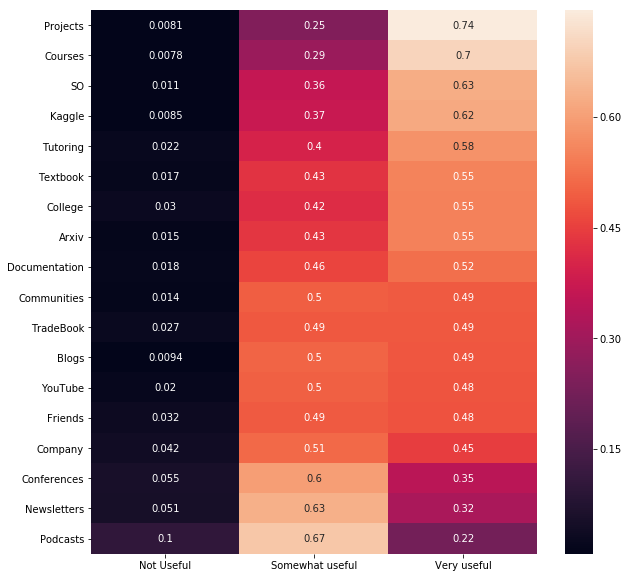

In [40]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴봄
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

#학습 플랫폼이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

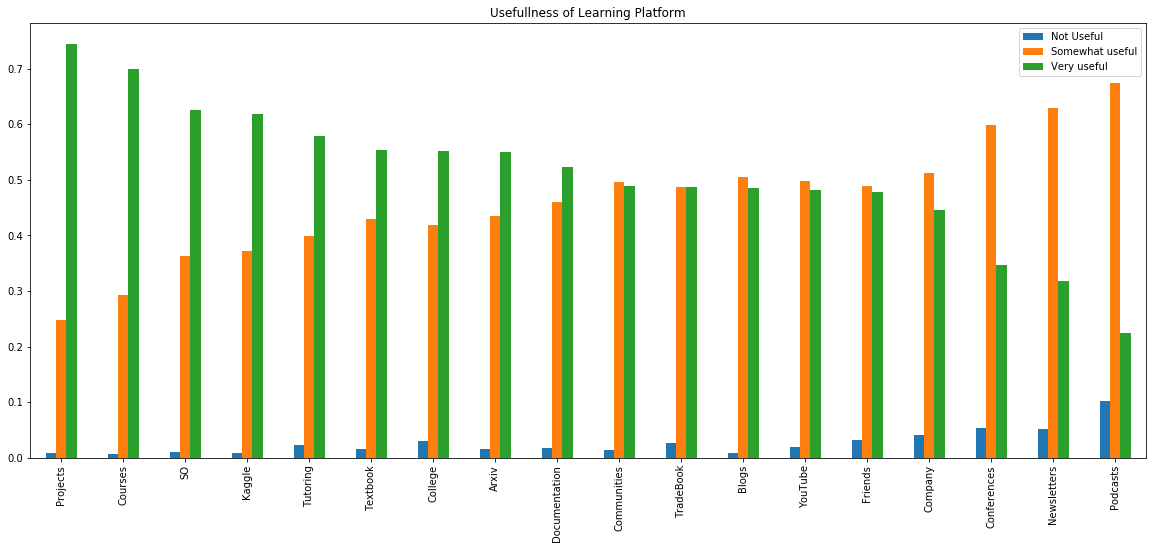

In [41]:
# 유용함의 정도를 플랫폼별로 그룹화해서 본다.
fdf.plot(kind='bar', figsize=(20,8), title="Usefullness of Learning Platform")

 실제로 프로젝트를 해보는 것에 대한 응답이 74.7%로 가장 많았따. SO는 스택오버플로우로 예상함. 캐클, 수업, 책이 도움이 많이 되는 편으로 나옴. 팟캐스트는 유용한것은 아니나가끔은 유용한 것으로 나옴 

In [42]:
cat_features = [x for x in mcq.columns if x.find("LearningCategory") != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [43]:
cdf = {}
for feature in cat_features:
    cdf[feature[len("LearningCategory"):]] = mcq[feature].mean()
    
# 파이 차트를 그리기 위해 평균값을 구해와서 담아줌

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

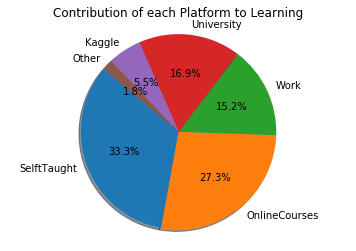

In [44]:
# 학습 플랫폼별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인 프로젝트를 해보는 것이 가장 도움이 많이 되었으며, 온라인코스,대학,직장업무, 캐글순이다.

Q4. 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가? 

In [45]:
#설문 내용을 누구에게 물어봤는지 찾아봄
qc = question.loc[question['Column'].str.contains("HardwarePersonalProjectsSelect")]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [46]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [47]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x : x.split(','))
s = mcq.apply(lambda x : pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='hardware'

In [48]:
s = s[s != 'nan']

In [49]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많았고, 랩탑과 함께 클라우드를 사용하는 사람들이 그다음이고, 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다. 

Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는가? 

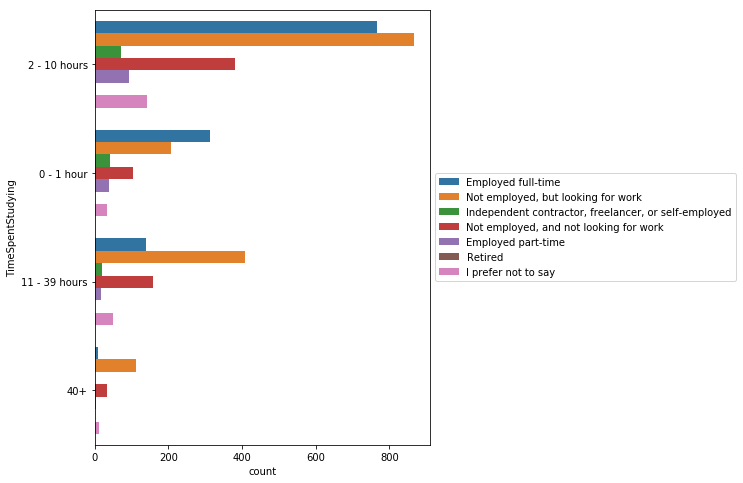

In [50]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

풀타임 근무하는 사람들은 2~10시간 공부를 하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다. 

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다

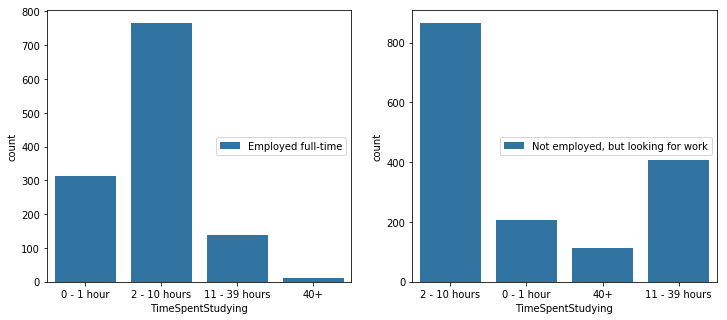

In [51]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus',ax=ax1).legend(loc='center right', bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying', data=looking_for_job, hue='EmploymentStatus',ax=ax2).legend(loc='center right', bbox_to_anchor=(1,0.5))

### ML&DL 3

#### 설문조사 응답분석3

Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할 만한 것이 있는지? 

In [52]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [53]:
s = mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = "platforms"
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [54]:
s = s[s!='nan'].value_counts().head(20)

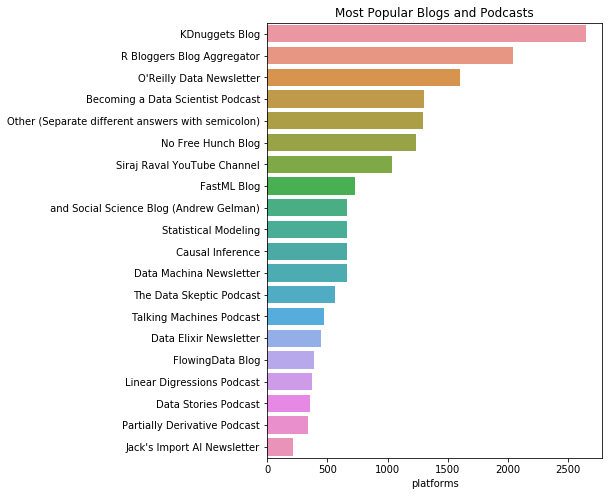

In [55]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter가 가장 유용하다고 한다.

 - [Machine Learning, Data Science, Data Mining, Big Data, Analytics, AI](https://www.kdnuggets.com/)
 - [Becoming a Data Scientist](UCfxnrdBM1YRV9j2MB8aiy4Q)
 - [Siraj Raval](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)

In [56]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x : x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [57]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1,drop=True)
t.name = ' courses'
t.head()

0         nan
1         nan
2    Coursera
2         edX
3         nan
Name:  courses, dtype: object

![Single_stack](./Img/stack.jpg)
![Multi_stack](./lmg/stack2.jpg)

In [58]:
t = t[t != 'nan'].value_counts()
t

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
Name:  courses, dtype: int64

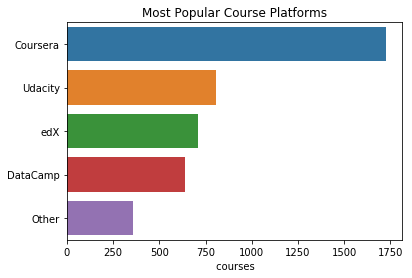

In [59]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

Coursera와 Udacity가 가장 인기있는 플랫폼이다.

Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은??

In [60]:
job_features =[ x for x in mcq.columns if x.find('JobSkillImportance') != -1 and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [61]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts(normalize=True)
    jdf[feature[len('JobSkillImportance'):]] = a
    
jdf
    

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [62]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


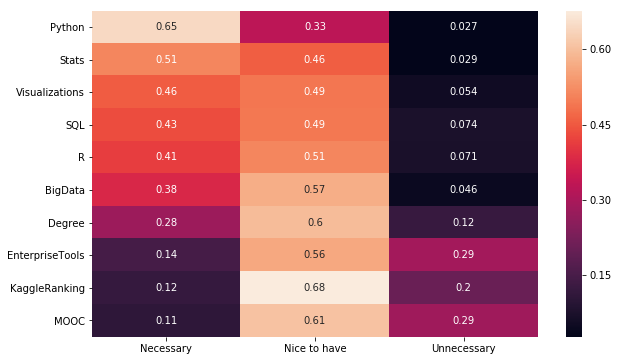

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", ascending=False), annot=True)

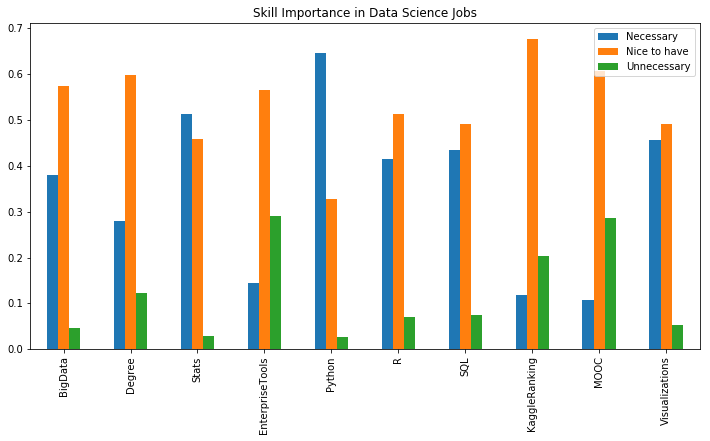

In [64]:
jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")

꼭 필요한 것으로 python, R , SQL, 통계, 시각화가 있다.있으면 좋은것은
빅데이터, 학위, 툴 사용법, 캐글랭킹, 무크가 있다.

Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [65]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [76]:
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('C://BigData/Kaggle/ML&DataSurvey2017/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
 ['CompensationAmount','CompensationCurrency',
 'GenderSelect',
 'Country',
 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
 right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
 salary['CompensationAmount']) * salary['exchangeRate']
salary.head()


,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [72]:
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


가장 큰 수치는 여러 국가의 GDP보다 큼. 아마도 가짜 응답으로 보인다. 

In [78]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']?]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

SyntaxError: invalid syntax (<ipython-input-78-fa4464f69314>, line 2)

Country
United States                  108000.0000
Switzerland                    104338.2000
Australia                       93469.1150
Norway                          87875.4000
Denmark                         80365.0000
Israel                          74852.5680
Netherlands                     74141.2120
Sweden                          72803.4480
Germany                         71749.5600
Canada                          70013.4800
Ireland                         66667.2995
United Kingdom                  66209.4000
Japan                           63756.0000
New Zealand                     61863.0850
Singapore                       58144.7187
Belgium                         57399.6480
France                          53812.1700
Finland                         47833.0400
South Africa                    46201.2000
Italy                           45441.3880
Spain                           43049.7360
Hong Kong                       37631.4120
Republic of China               36720.0000
Sou

In [87]:
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30]
sal_coun.to_frame()

,Salary
Country,
United States,108000.0000
Switzerland,104338.2000
Australia,93469.1150
Norway,87875.4000
Denmark,80365.0000
Israel,74852.5680
Netherlands,74141.2120
Sweden,72803.4480
Germany,71749.5600


In [88]:
sns.barplot('Salary', sal_coun.index, data= sal_coun, palette='RdYIGn')
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary paying Countries')

ValueError: Could not interpret input 'Salary'